# Decision Tree
**Decison Tree** - Cây quyết định là phương pháp học có giám sát không tham số dựa vào ý tưởng xây dựng mô hình dạng cây để xấp xỉ dữ liệu huấn luyện. Cấu trúc cây quyết định được mô tả như hình sau:

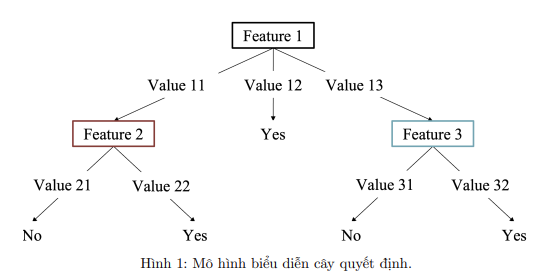

Cây quyết định có một số đặc trưng sau:
* Cây có các node là các thuộc tính của dữ liệu. Ví dụ như thuộc tính về Nhiệt độ.
* Các đường nối giữa các node là các giá trị của thuộc tính. Ví dụ thuộc tính nhiệt độ sẽ có các giá trị như: Cao, Trung Bình, Thấp.
* Các node lá đại diện cho các kết quả có thể có của mô hình. Ví dụ với bài toán phân loại nhị phân thì các node lá có thể nhận kết quả là ‘0’ hoặc ‘1’.

Để xây dựng cây quyết định trên, chúng ta sử dụng thuật toán Iterative Dichotomiser (ID3) xây dựng theo chiều từ trên xuống dựa theo một số độ đo để xác định thuộc tính nào sẽ là node gốc và các thuộc tính ở node con là gì? Một số độ đo thường được sử dụng để đánh giá độ quan trọng của các thuộc tính như Gini Impurity hoặc Entropy / Information Gain cho bài toán classification và Variance / Sum of Squared Errors (SSE) cho bài toán regression.

Ví dụ về cây quyết định sau khi được huấn luyện như sau:

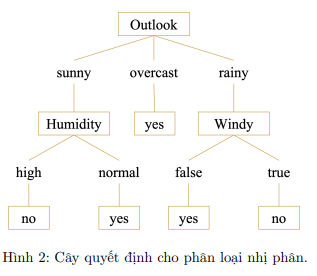

## Decision Tree for Classification
* Độ đo Gini có thể được xác định bởi công thức:

$Gini(D) = \displaystyle\frac{n_1}{n}Gini(D_1) + \displaystyle\frac{n_2}{n}Gini(D_2)$

$Gini(D_i) = 1 - \sum_{j=1}^{c}p_j^2$


* Độ đo Entropy được xác định bởi công thức:


$Entropy(D) = \displaystyle\frac{n_1}{n}Entropy(D_1) + \displaystyle\frac{n_2}{n}Entropy(D_2)$

$Entropy(D_i) = - \sum_{j=1}^{c}p_jlog_2p_j$

Trong đó $D$ là tập dữ liệu ban đầu có $n$ phần tử và có thể được phân chia thành 2 tập con là $D_1$ có $n_1$ phần tử và $D_2$ có $n_2$ phần tử. $p_j$ là xác suất của các sample trong $D_i$ thuộc vào class $c$

* Độ đo Information Gain được xác định bởi công thức:

$Gain(D) = 1 - Entropy(D)$

Để xác định được thuộc tính quan trọng với cây quyết định chúng ta có thể chọn *Entropy* hoặc *Gini thấp nhất*, *Gain cao nhất*.

Bảng dữ liệu cho bài toán Classification.

In [1]:
import pandas as pd
import numpy as np
import math

data = dict({'Age':[23,25,27,29,29], 'Likes English':[0,1,1,0,0], 'Likes AI':[0,1,0,1,0], 'Raise Salary':[0,0,1,1,0]})
df1 = pd.DataFrame(data)
df1

,Age,Likes English,Likes AI,Raise Salary
0,23,0,0,0
1,25,1,1,0
2,27,1,0,1
3,29,0,1,1
4,29,0,0,0


In [2]:
# Câu hỏi 2 Tính giá trị Gini của các mẫu trong cột nhãn D = ‘Raise Salary’?
label = 'Raise Salary'
count_0 = len(df1[df1[label]==0])
count_1 = len(df1[df1[label]==1])
count_total = len(df1)

Gini_D = 1 - (count_0/count_total)**2 - (count_1/count_total)**2
Gini_D

0.48

In [3]:
# Câu hỏi 3 Tính Gini của bộ dữ liệu khi thuộc tính ‘Likes English’ được chọn là node gốc?
root_node = 'Likes English'
count_le_0 = len(df1[df1[root_node]==0])
count_le_1 = len(df1[df1[root_node]==1])
count_total = len(df1)

count_le_0_rs_0 = len(df1[(df1[root_node]==0) & (df1[label]==0)])
count_le_0_rs_1 = len(df1[(df1[root_node]==0) & (df1[label]==1)])
count_le_1_rs_0 = len(df1[(df1[root_node]==1) & (df1[label]==0)])
count_le_1_rs_1 = len(df1[(df1[root_node]==1) & (df1[label]==1)])

gini_le_0 = 1 - (count_le_0_rs_0/count_le_0)**2 - (count_le_0_rs_1/count_le_0)**2
gini_le_1 = 1 - (count_le_1_rs_0/count_le_1)**2 - (count_le_1_rs_1/count_le_1)**2

gini_root = (count_le_0 / count_total) * gini_le_0 + (count_le_1 / count_total) * gini_le_1
gini_root = round(gini_root, 2)
gini_root

0.47

In [4]:
df1 = df1.sort_values(by=['Age'])
mean_arr = []
for i in range(len(df1)-1):
    mean = (df1.iloc[i]['Age'] + df1.iloc[i+1]['Age']) / 2
    mean_arr.append(mean)
mean_arr

[24.0, 26.0, 28.0, 29.0]

In [17]:
# Câu hỏi 4 Tính Gini của bộ dữ liệu khi thuộc tính ‘Age’ được chọn là node gốc với điều kiện phân
#  chia thành tập D1 và D2 là ‘Age <= 26’?
root_node = 'Age'
selected_mean = 26

count_age_lte_mean = len(df1[df1[root_node]<=selected_mean])
count_age_gt_mean = len(df1[df1[root_node]>selected_mean])
count_total = len(df1)
print("count_age_lte_mean: ", count_age_lte_mean)
print("count_age_gt_mean: ", count_age_gt_mean)

count_age_lte_mean_rs_0 = len(df1[(df1[root_node]<=selected_mean) & (df1[label]==0)])
count_age_lte_mean_rs_1 = len(df1[(df1[root_node]<=selected_mean) & (df1[label]==1)])
count_age_gt_mean_rs_0 = len(df1[(df1[root_node]>selected_mean) & (df1[label]==0)])
count_age_gt_mean_rs_1 = len(df1[(df1[root_node]>selected_mean) & (df1[label]==1)])
print("count_age_lte_mean_rs_0: ", count_age_lte_mean_rs_0)
print("count_age_lte_mean_rs_1: ", count_age_lte_mean_rs_1)
print("count_age_gt_mean_rs_0: ", count_age_gt_mean_rs_0)
print("count_age_gt_mean_rs_1: ", count_age_gt_mean_rs_1)

gini_age_lte26 = 1 - (count_age_lte_mean_rs_0/count_age_lte_mean)**2 - (count_age_lte_mean_rs_1/count_age_lte_mean)**2
gini_age_gt26 = 1 - (count_age_gt_mean_rs_0/count_age_gt_mean)**2 - (count_age_gt_mean_rs_1/count_age_gt_mean)**2
print("gini_age_lte26: ", gini_age_lte26)
print("gini_age_gt26: ", gini_age_gt26)

gini_root = (count_age_lte_mean / count_total) * gini_age_lte26 + (count_age_gt_mean / count_total) * gini_age_gt26
gini_root = round(gini_root, 2)

print("gini_root: ", gini_root)

count_age_lte_mean:  2
count_age_gt_mean:  3
count_age_lte_mean_rs_0:  2
count_age_lte_mean_rs_1:  0
count_age_gt_mean_rs_0:  1
count_age_gt_mean_rs_1:  2
gini_age_lte26:  0.0
gini_age_gt26:  0.4444444444444444
gini_root:  0.27


In [16]:
# Câu hỏi 5 Tính giá trị Entropy của các sample trong cột nhãn D = ‘Raise Salary’?
label = 'Raise Salary'
count_0 = len(df1[df1[label]==0])
count_1 = len(df1[df1[label]==1])
count_total = len(df1)

Entropy_D = - (count_0/count_total) * math.log2(count_0/count_total) - (count_1/count_total) * math.log2(count_1/count_total)
Entropy_D = round(Entropy_D, 2)
Entropy_D

0.97

In [20]:
# Câu hỏi 6 Tính Gain của bộ dữ liệu khi thuộc tính ‘Likes English’ được chọn là node gốc?
root_node = 'Likes English'
count_le_0 = len(df1[df1[root_node]==0])
count_le_1 = len(df1[df1[root_node]==1])
count_total = len(df1)

count_le_0_rs_0 = len(df1[(df1[root_node]==0) & (df1[label]==0)])
count_le_0_rs_1 = len(df1[(df1[root_node]==0) & (df1[label]==1)])
count_le_1_rs_0 = len(df1[(df1[root_node]==1) & (df1[label]==0)])
count_le_1_rs_1 = len(df1[(df1[root_node]==1) & (df1[label]==1)])

entropy_le_0 = 0 if count_le_0 == 0 else - (count_le_0_rs_0/count_le_0) * math.log2(count_le_0_rs_0/count_le_0) - (count_le_0_rs_1/count_le_0) * math.log2(count_le_0_rs_1/count_le_0)
entropy_le_1 = 0 if count_le_1 == 0 else - (count_le_1_rs_0/count_le_1) * math.log2(count_le_1_rs_0/count_le_1) - (count_le_1_rs_1/count_le_1) * math.log2(count_le_1_rs_1/count_le_1)

entropy_root = (count_le_0 / count_total) * entropy_le_0 + (count_le_1 / count_total) * entropy_le_1
#entropy_root = round(entropy_root, 2)
gain = 1 - entropy_root
gain

0.04902249956730631

In [22]:
# Câu hỏi 7 Dòng lệnh nào sau đây để tải về bộ dữ liệu Iris từ thư viện ‘sklearn’ là?
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)
# Split train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

# Define model
dt_classifier = DecisionTreeClassifier()

# Train
dt_classifier.fit(X_train, y_train)

# Preidct and evaluate
y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

## Decision Tree for Regression
Với bài toán Regression. Để chọn được thuộc tính tốt phân chia bộ dữ liệu và xây dựng cây, chúng ta sẽ sử dụng độ đo SSE. Độ đo Sum of Squared Error (SSE) được xác định bởi công thức:

$SSE(D) = SSE(D_1) + SSE(D_2)$

$SSE(D_i) = \displaystyle\frac{1}{n_i}\sum_{j=1}^{n_i}(x_j - \bar{x_i})^2 $

Trong đó D là tập dữ liệu ban đầu có $n$ phần tử và có thể đuộc phân chia thành 2 tập con là $D_1$ có $n_1$ phần tử và $D_2$ có $n_2$ phần tử. $x_i$ là giá trị trung bình của các phần tử trong tập $D_i$.

Để xác định được thuộc tính quan trọng với cây quyết định chúng ta chọn SSE với giá trị cao nhất.

In [24]:
data = dict({'Age':[23,25,27,29,29], 'Likes English':[0,1,1,0,0], 'Likes AI':[0,1,0,1,0], 'Raise Salary':[200,400,300,500,400]})
df2 = pd.DataFrame(data)
df2

,Age,Likes English,Likes AI,Raise Salary
0,23,0,0,200
1,25,1,1,400
2,27,1,0,300
3,29,0,1,500
4,29,0,0,400


In [42]:
# Câu hỏi 9 Tính SSE của bộ dữ liệu khi thuộc tính ‘Likes AI’ được chọn là node gốc?
root_node = 'Likes AI'
df_lai_0 = df2[df2[root_node]==0]
df_lai_1 = df2[df2[root_node]==1]
#print("df_lai_0:\n", df_lai_0)
#print("df_lai_0 mean: ", df_lai_0[label].mean())
#print("df_lai_1:\n", df_lai_1)
#print("df_lai_1 mean: ", df_lai_1[label].mean())

sse = sum((df_lai_0[label] - df_lai_0[label].mean()) **2) / len(df_lai_0) + sum((df_lai_1[label] - df_lai_1[label].mean()) **2)/len(df_lai_1)
sse = round(sse, 0)
sse

9167.0

In [44]:
# Câu hỏi 10 Tính SSE của bộ dữ liệu khi thuộc tính ‘Age’ được chọn là node gốc với điều kiện phân
# chia thành tập D1 và D2 là ‘Age <= 24’?
root_node = 'Age'
selected_mean = 24

df_age_lte_mean = df2[df2[root_node]<=selected_mean]
df_age_gt_mean = df2[df2[root_node]>selected_mean]
#print("df_age_lte_mean mean: ", df_age_lte_mean[label].mean())
#print("df_age_gt_mean mean: ", df_age_gt_mean[label].mean())

#df_age_lte_mean['-mean'] = df_age_lte_mean[label] - df_age_lte_mean[label].mean()
#df_age_lte_mean['**2'] = df_age_lte_mean['-mean'].apply(lambda x: x**2)
#print("df_age_lte_mean: ", df_age_lte_mean)

#df_age_gt_mean['-mean'] = df_age_gt_mean[label] - df_age_gt_mean[label].mean()
#df_age_gt_mean['**2'] = df_age_gt_mean['-mean'].apply(lambda x: x**2)
#print("df_age_gt_mean: ", df_age_gt_mean)

sse = sum((df_age_lte_mean[label] - df_age_lte_mean[label].mean()) **2) / len(df_age_lte_mean) + sum((df_age_gt_mean[label] - df_age_gt_mean[label].mean()) **2)/ len(df_age_gt_mean)
sse

5000.0

In [46]:
# Câu hỏi 11 Sắp xếp các đoạn code phân loại trên bộ dữ liệu CPU Machine dựa vào Decision Tree Regressor:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
machine_cpu = fetch_openml(name='machine_cpu')
machine_data = machine_cpu.data
machine_labels = machine_cpu.target
# Split train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(machine_data, machine_labels,test_size=0.2,random_state=42)

# Define model
tree_reg = DecisionTreeRegressor()

# Train
tree_reg.fit(X_train, y_train)

# Preidct and evaluate
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


9149.505952380952